In [3]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [156]:
df = pd.read_csv('./Downloads/jamb_exam_scores.csv')
df.head()

,JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,School_Type,School_Location,Extra_Tutorials,Access_To_Learning_Materials,Parent_Involvement,IT_Knowledge,Student_ID,Age,Gender,Socioeconomic_Status,Parent_Education_Level,Assignments_Completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,2,15,Male,High,NaN,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,3,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,4,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,5,22,Female,Medium,Tertiary,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   JAMB_Score                    5000 non-null   int64  
 1   Study_Hours_Per_Week          5000 non-null   int64  
 2   Attendance_Rate               5000 non-null   int64  
 3   Teacher_Quality               5000 non-null   int64  
 4   Distance_To_School            5000 non-null   float64
 5   School_Type                   5000 non-null   object 
 6   School_Location               5000 non-null   object 
 7   Extra_Tutorials               5000 non-null   object 
 8   Access_To_Learning_Materials  5000 non-null   object 
 9   Parent_Involvement            5000 non-null   object 
 10  IT_Knowledge                  5000 non-null   object 
 11  Student_ID                    5000 non-null   int64  
 12  Age                           5000 non-null   int64  
 13  Gen

In [9]:
df.isnull().sum()

JAMB_Score                        0
Study_Hours_Per_Week              0
Attendance_Rate                   0
Teacher_Quality                   0
Distance_To_School                0
School_Type                       0
School_Location                   0
Extra_Tutorials                   0
Access_To_Learning_Materials      0
Parent_Involvement                0
IT_Knowledge                      0
Student_ID                        0
Age                               0
Gender                            0
Socioeconomic_Status              0
Parent_Education_Level          891
Assignments_Completed             0
dtype: int64

In [11]:
df['Parent_Education_Level'] = df['Parent_Education_Level'].fillna('Unavailable')

In [13]:
df.isnull().sum().max()

0

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   JAMB_Score                    5000 non-null   int64  
 1   Study_Hours_Per_Week          5000 non-null   int64  
 2   Attendance_Rate               5000 non-null   int64  
 3   Teacher_Quality               5000 non-null   int64  
 4   Distance_To_School            5000 non-null   float64
 5   School_Type                   5000 non-null   object 
 6   School_Location               5000 non-null   object 
 7   Extra_Tutorials               5000 non-null   object 
 8   Access_To_Learning_Materials  5000 non-null   object 
 9   Parent_Involvement            5000 non-null   object 
 10  IT_Knowledge                  5000 non-null   object 
 11  Student_ID                    5000 non-null   int64  
 12  Age                           5000 non-null   int64  
 13  Gen

In [158]:
df.describe()

,JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,Student_ID,Age,Assignments_Completed
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,174.074600,19.521200,84.235200,2.521400,10.005460,2500.500000,18.445800,1.804600
std,47.616477,9.634569,9.485688,0.985564,4.820221,1443.520003,2.301504,0.992076
min,100.000000,0.000000,50.000000,1.000000,0.000000,1.000000,15.000000,1.000000
25%,135.000000,13.000000,78.000000,2.000000,6.600000,1250.750000,16.000000,1.000000
50%,170.000000,19.000000,84.000000,2.000000,10.000000,2500.500000,18.000000,1.000000
75%,209.000000,26.000000,91.000000,3.000000,13.400000,3750.250000,20.000000,2.000000
max,367.000000,40.000000,100.000000,5.000000,20.000000,5000.000000,22.000000,5.000000


In [19]:
df.columns

Index(['JAMB_Score', 'Study_Hours_Per_Week', 'Attendance_Rate',
       'Teacher_Quality', 'Distance_To_School', 'School_Type',
       'School_Location', 'Extra_Tutorials', 'Access_To_Learning_Materials',
       'Parent_Involvement', 'IT_Knowledge', 'Student_ID', 'Age', 'Gender',
       'Socioeconomic_Status', 'Parent_Education_Level',
       'Assignments_Completed'],
      dtype='object')

In [21]:
num = ['JAMB_Score', 'Study_Hours_Per_Week', 'Attendance_Rate',
       'Teacher_Quality', 'Distance_To_School', 'Age','Assignments_Completed']

In [25]:
corr_matrix = df[num].corr()
corr_matrix

,JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,Age,Assignments_Completed
JAMB_Score,1.000000,0.420061,0.280953,0.299505,-0.094142,-0.028432,0.278079
Study_Hours_Per_Week,0.420061,1.000000,0.129738,0.120297,-0.022266,-0.024121,0.618464
Attendance_Rate,0.280953,0.129738,1.000000,0.080537,-0.057385,0.008382,0.087490
Teacher_Quality,0.299505,0.120297,0.080537,1.000000,0.005902,-0.022594,0.068621
Distance_To_School,-0.094142,-0.022266,-0.057385,0.005902,1.000000,0.001874,-0.017597
Age,-0.028432,-0.024121,0.008382,-0.022594,0.001874,1.000000,-0.000127
Assignments_Completed,0.278079,0.618464,0.087490,0.068621,-0.017597,-0.000127,1.000000


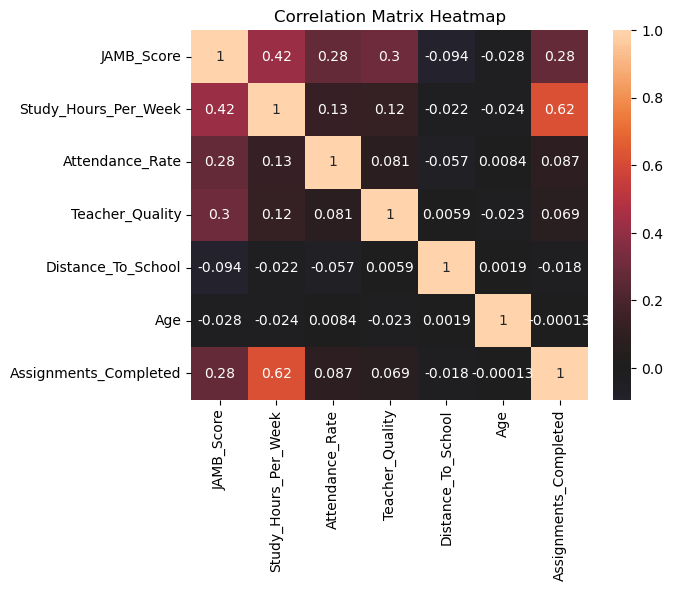

In [27]:
sns.heatmap(corr_matrix, annot=True, center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [160]:
df['JAMB_Score'].describe ()

count    5000.000000
mean      174.074600
std        47.616477
min       100.000000
25%       135.000000
50%       170.000000
75%       209.000000
max       367.000000
Name: JAMB_Score, dtype: float64

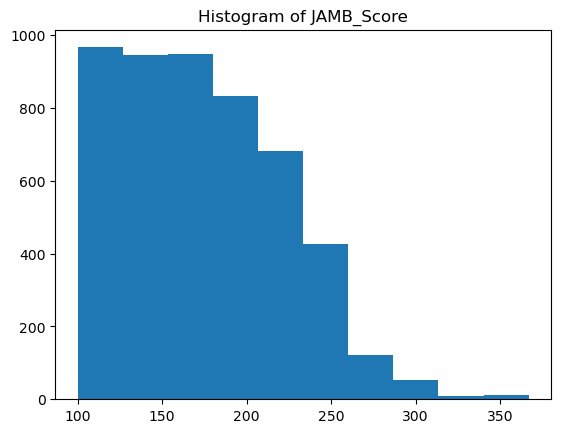

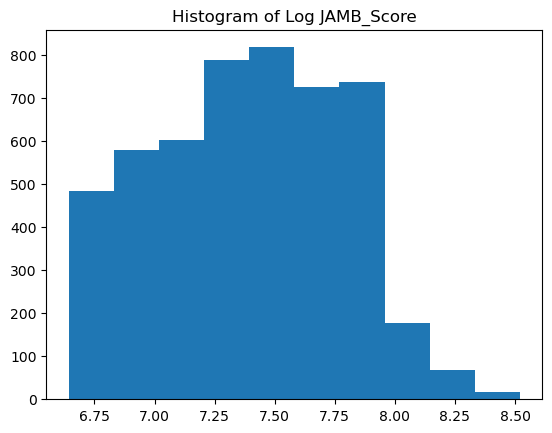

In [162]:
x = df['JAMB_Score']
plt.hist(x)
plt.title('Histogram of JAMB_Score')
plt.show()

log_x = np.log2(x)
plt.hist(log_x)
plt.title('Histogram of Log JAMB_Score')
plt.show()

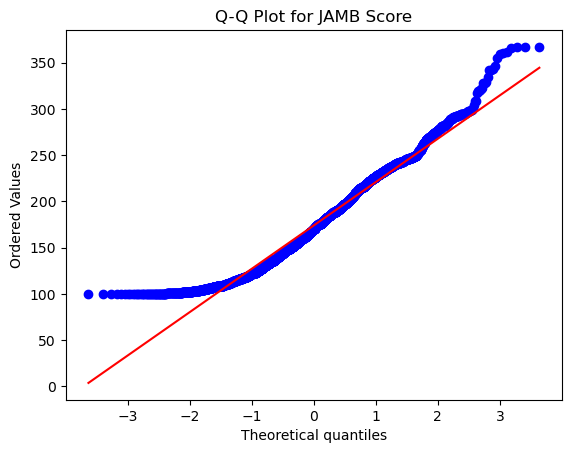

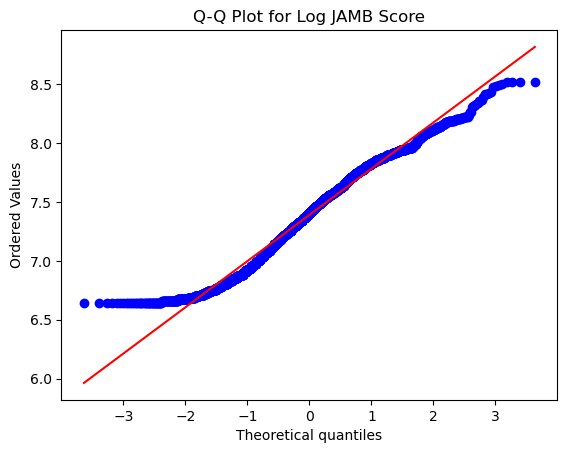

In [164]:
fig = plt.figure()
stats.probplot(x, dist="norm", plot=plt)

plt.title("Q-Q Plot for JAMB Score")
plt.show()

fig = plt.figure()
stats.probplot(log_x, dist="norm", plot=plt)

plt.title("Q-Q Plot for Log JAMB Score")
plt.show()

In [166]:
q3 = x.describe()['75%']
q1 = x.describe()['25%']
IQR = q3-q1
print(IQR)

74.0


In [168]:
u_b = q3 + 1.5 * IQR
l_b= q1 - 1.5 * IQR
print (u_b, l_b)

320.0 24.0


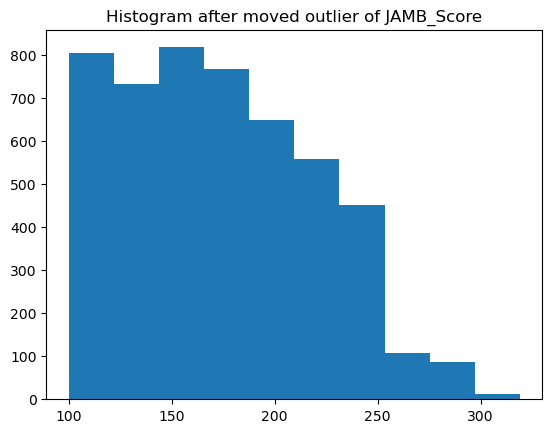

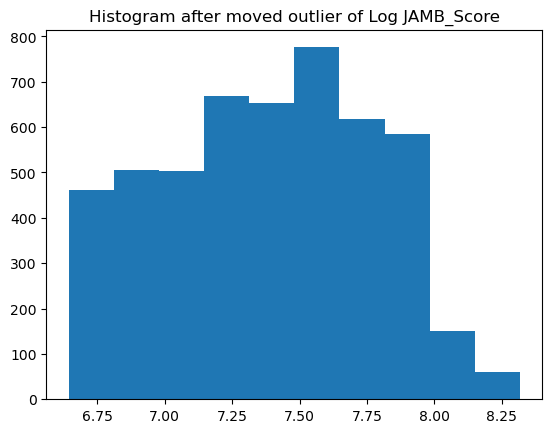

In [170]:
h = x[(x > l_b) & (x < u_b)]
plt.hist(h)
plt.title('Histogram after moved outlier of JAMB_Score')
plt.show()

h = x[(x > l_b) & (x < u_b)]
log_x = np.log2(h)
plt.hist(log_x)
plt.title('Histogram after moved outlier of Log JAMB_Score')
plt.show()

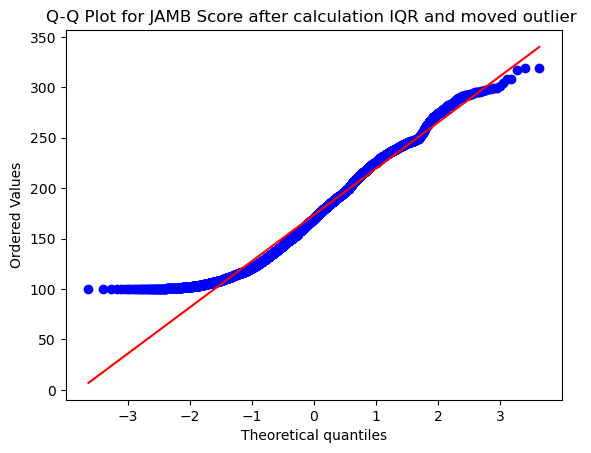

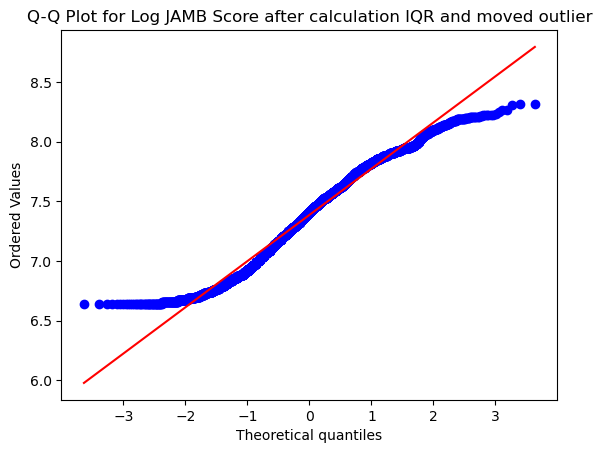

In [176]:
fig = plt.figure()
stats.probplot(h, dist="norm", plot=plt)

plt.title("Q-Q Plot for JAMB Score after calculation IQR and moved outlier ")
plt.show()

fig = plt.figure()
stats.probplot(log_x, dist="norm", plot=plt)

plt.title("Q-Q Plot for Log JAMB Score after calculation IQR and moved outlier")
plt.show()

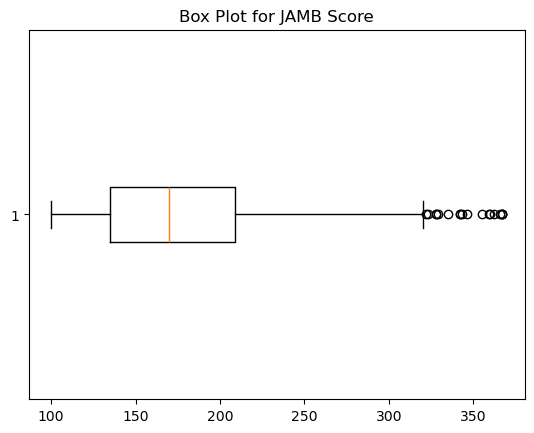

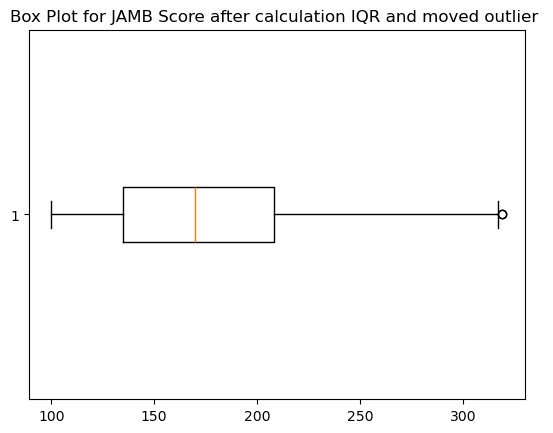

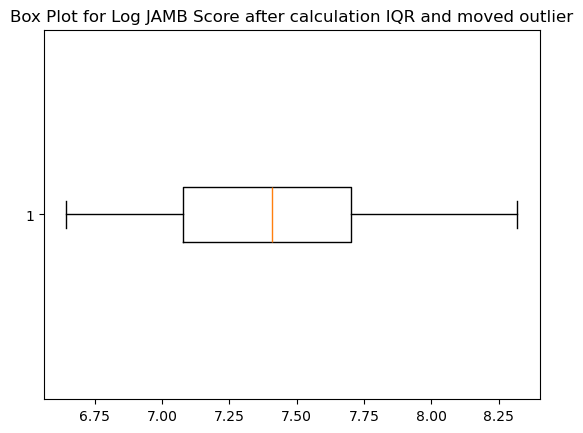

In [172]:
plt.boxplot(x, vert=False)
plt.title('Box Plot for JAMB Score')
plt.show()

plt.boxplot(h, vert=False)
plt.title('Box Plot for JAMB Score after calculation IQR and moved outlier ')
plt.show()

plt.boxplot(log_x, vert=False)
plt.title('Box Plot for Log JAMB Score after calculation IQR and moved outlier')
plt.show()

In [49]:
pc = df[['JAMB_Score', 'Study_Hours_Per_Week']].mean()
pc

JAMB_Score              174.0746
Study_Hours_Per_Week     19.5212
dtype: float64

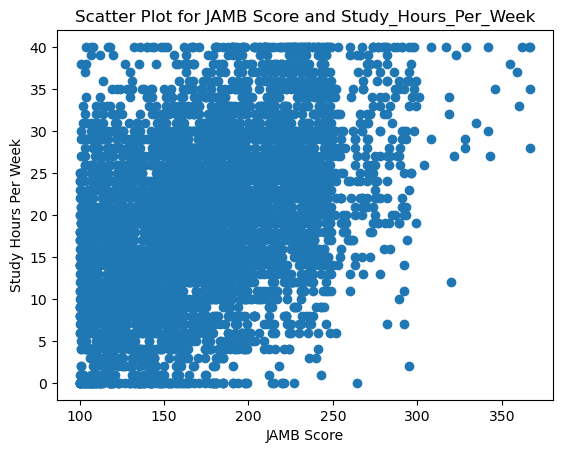

In [51]:
y = df['Study_Hours_Per_Week']
plt.scatter(x, y)
plt.xlabel('JAMB Score')
plt.ylabel('Study Hours Per Week')
plt.title('Scatter Plot for JAMB Score and Study_Hours_Per_Week')
plt.show()

In [53]:
x = df['JAMB_Score']
y = df['Study_Hours_Per_Week']

p_r = x * y

s_s = x * x

b = (p_r.sum() - len(x) * x.mean() * y.mean()) / (s_s.sum() - len(x) * x.mean()**2)

a = y.mean() - b * x.mean()

print(b, a)

0.08499387108740668 4.725925888008117


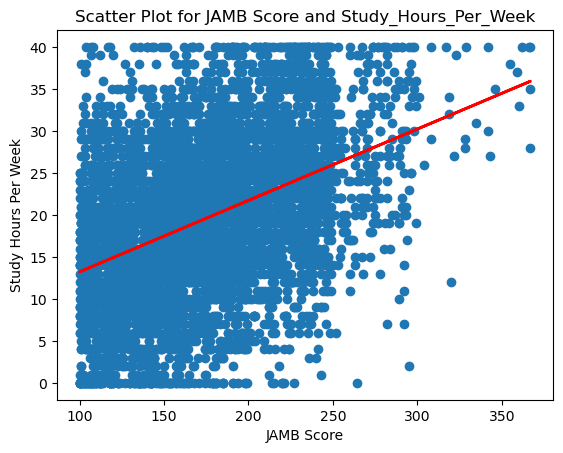

In [335]:
plt.scatter(x,y)
plt.xlabel('JAMB Score')
plt.ylabel('Study Hours Per Week')
plt.plot(x, b*x+a, color='red', linewidth=2)
plt.title('Scatter Plot for JAMB Score and Study_Hours_Per_Week')
plt.show()

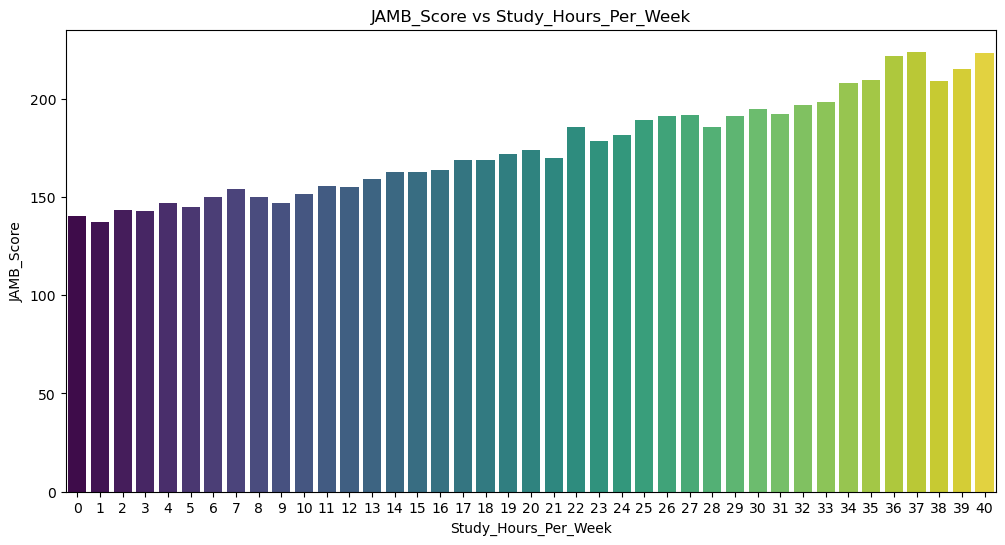

In [126]:
study_hours_avg = df[['JAMB_Score', 'Study_Hours_Per_Week']].groupby('Study_Hours_Per_Week').mean().reset_index()

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=study_hours_avg, x='Study_Hours_Per_Week', y='JAMB_Score', hue='Study_Hours_Per_Week', palette="viridis", legend=False)
plt.title('JAMB_Score vs Study_Hours_Per_Week')
plt.xlabel('Study_Hours_Per_Week')
plt.ylabel('JAMB_Score')
plt.show()

In [55]:
x = df['JAMB_Score']
y = df['Attendance_Rate']

p_r = x * y

s_s = x * x

b = (p_r.sum() - len(x) * x.mean() * y.mean()) / (s_s.sum() - len(x) * x.mean()**2)

a = y.mean() - b * x.mean()

print(b, a)

0.05596869246984122 74.49247224578939


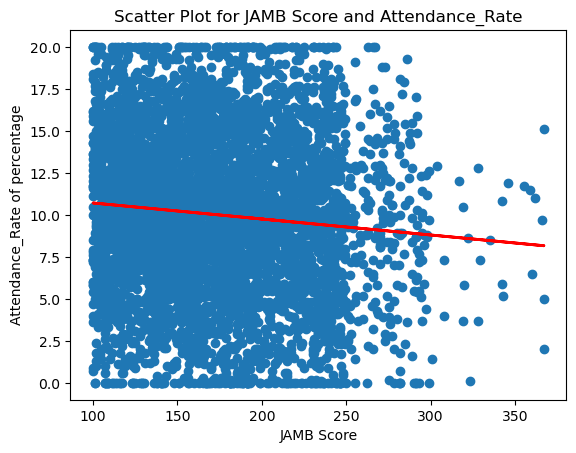

In [43]:
plt.scatter(x,y)
plt.xlabel('JAMB Score')
plt.ylabel('Attendance_Rate')
plt.plot(x, b*x+a, color='red', linewidth=2)
plt.title('Scatter Plot for JAMB Score and Attendance_Rate')
plt.show()

In [57]:
df[['JAMB_Score', 'Teacher_Quality']].groupby('Teacher_Quality').mean().reset_index()

,Teacher_Quality,JAMB_Score
0,1,152.002581
1,2,166.932840
2,3,180.686639
3,4,194.152047
4,5,216.556522


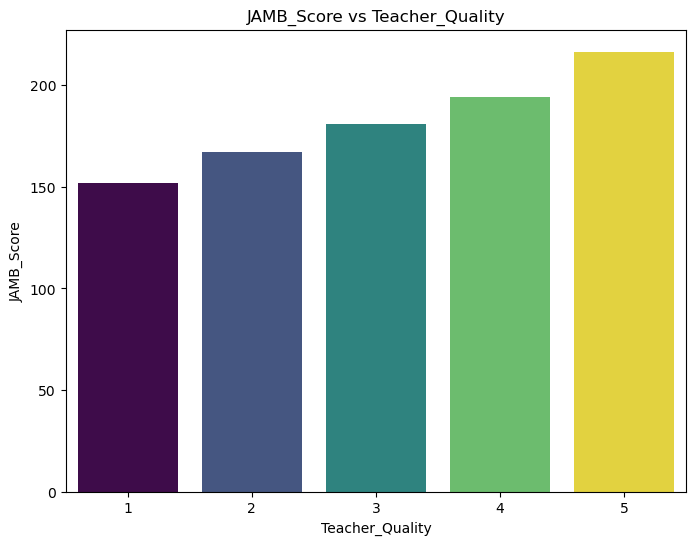

In [112]:
teacher_quality_avg = df[['JAMB_Score', 'Teacher_Quality']].groupby('Teacher_Quality').mean().reset_index()

# Plot the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(data=teacher_quality_avg, x='Teacher_Quality', y='JAMB_Score', hue='Teacher_Quality', palette="viridis", legend=False)
plt.title('JAMB_Score vs Teacher_Quality')
plt.xlabel('Teacher_Quality')
plt.ylabel('JAMB_Score')
plt.show()

In [61]:
df[['JAMB_Score', 'Assignments_Completed']].groupby('Assignments_Completed').mean().reset_index()

,Assignments_Completed,JAMB_Score
0,1,162.017758
1,2,180.828529
2,3,188.336054
3,4,200.233974
4,5,216.045455


In [63]:
df['Distance_To_School'].describe ()

count    5000.000000
mean       10.005460
std         4.820221
min         0.000000
25%         6.600000
50%        10.000000
75%        13.400000
max        20.000000
Name: Distance_To_School, dtype: float64

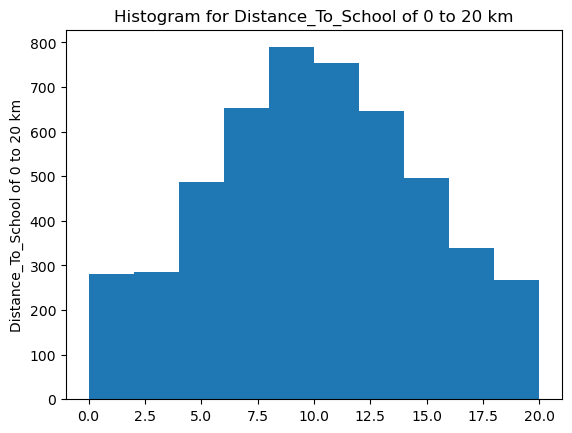

In [19]:
y = df['Distance_To_School']
plt.ylabel('Distance_To_School of 0 to 20 km')
plt.hist(y)
plt.title('Histogram for Distance_To_School of 0 to 20 km')
plt.show()

In [88]:
y = df['Distance_To_School'].dropna()  

mean_y = np.mean(y)
sem_y = stats.sem(y)

confidence_interval = stats.t.interval(0.95, len(y)-1, loc=mean_y, scale=sem_y)
print("95% Confidence Interval:", confidence_interval)

95% Confidence Interval: (9.871820387024139, 10.139099612975864)


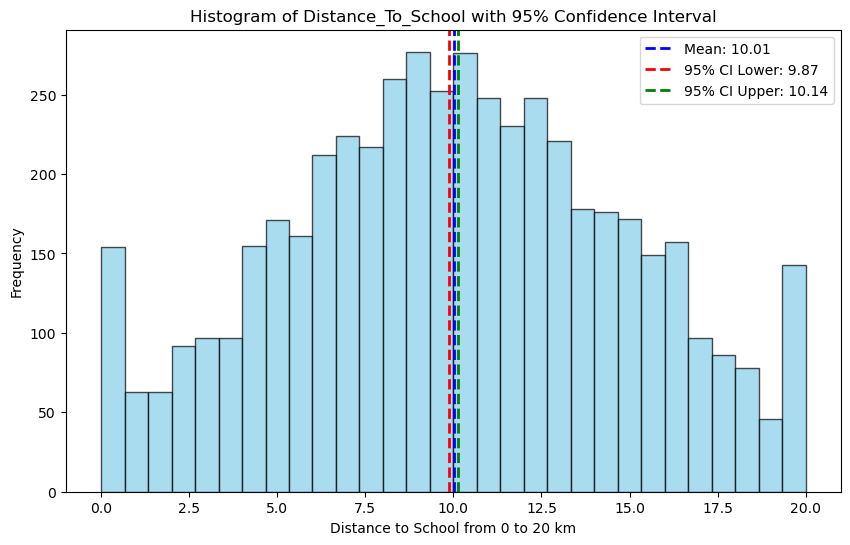

In [92]:
y = df['Distance_To_School'].dropna() 

mean_y = np.mean(y)
sem_y = stats.sem(y)

confidence_interval = stats.t.interval(0.95, len(y)-1, loc=mean_y, scale=sem_y)

plt.figure(figsize=(10, 6))
plt.hist(y, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.title("Histogram of Distance_To_School with 95% Confidence Interval")
plt.xlabel("Distance to School from 0 to 20 km")
plt.ylabel("Frequency")

plt.axvline(mean_y, color='blue', linestyle='--', linewidth=2, label=f"Mean: {mean_y:.2f}")
plt.axvline(confidence_interval[0], color='red', linestyle='--', linewidth=2, label=f"95% CI Lower: {confidence_interval[0]:.2f}")
plt.axvline(confidence_interval[1], color='green', linestyle='--', linewidth=2, label=f"95% CI Upper: {confidence_interval[1]:.2f}")

plt.legend()

plt.show()


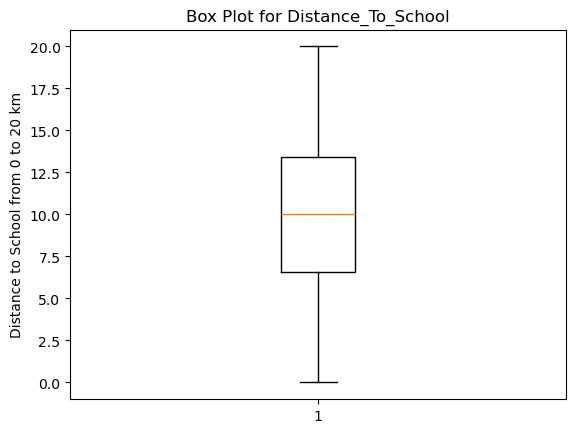

In [35]:
plt.boxplot(y, vert=True)
plt.title('Box Plot for Distance_To_School')
plt.ylabel("Distance to School from 0 to 20 km")
plt.show()

In [39]:
x = df['JAMB_Score']
y = df['Distance_To_School']

p_r = x * y

s_s = x * x

b = (p_r.sum() - len(x) * x.mean() * y.mean()) / (s_s.sum() - len(x) * x.mean()**2)

a = y.mean() - b * x.mean()

print(b, a)

-0.009529966659824444 11.664385134322277


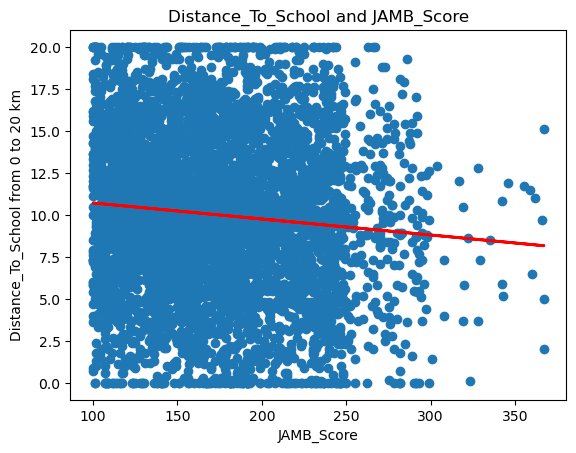

In [41]:
y = df['Distance_To_School']
plt.scatter(x, y)
plt.ylabel('Distance_To_School from 0 to 20 km')
plt.xlabel('JAMB_Score')
plt.plot(x, b*x+a, color='red', linewidth=2)
plt.title('Distance_To_School and JAMB_Score')
plt.show()

In [78]:
df['Study_Hours_Per_Week'].describe ()

count    5000.000000
mean       19.521200
std         9.634569
min         0.000000
25%        13.000000
50%        19.000000
75%        26.000000
max        40.000000
Name: Study_Hours_Per_Week, dtype: float64

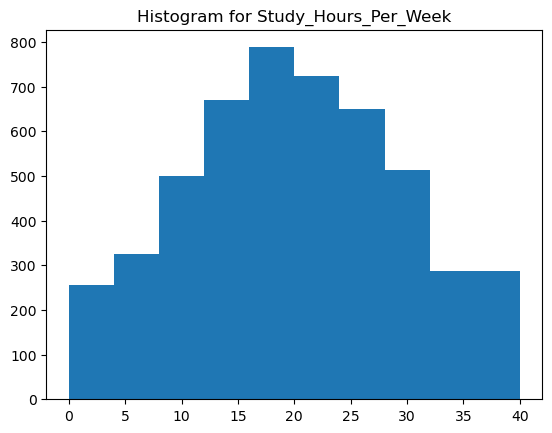

In [134]:
x = df['Study_Hours_Per_Week']
plt.hist(x)
plt.title('Histogram for Study_Hours_Per_Week')
plt.show()

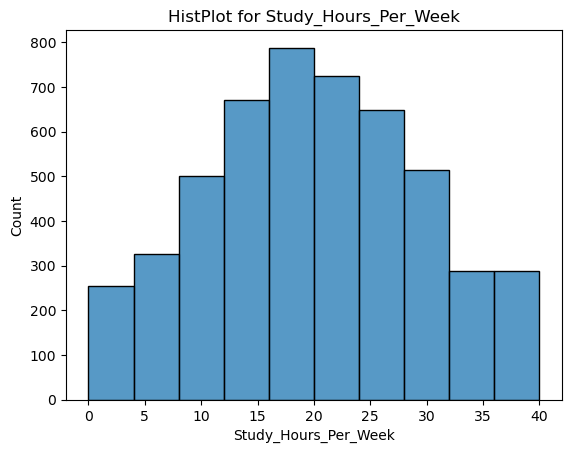

In [132]:
sns.histplot(x, bins=10)
plt.title('HistPlot for Study_Hours_Per_Week')
plt.show()

In [84]:
y = df['Study_Hours_Per_Week'].dropna() 

mean_y = np.mean(y)
sem_y = stats.sem(y)

confidence_interval = stats.t.interval(0.95, len(y)-1, loc=mean_y, scale=sem_y)
print("95% Confidence Interval:", confidence_interval)

95% Confidence Interval: (19.254083611367246, 19.788316388632754)


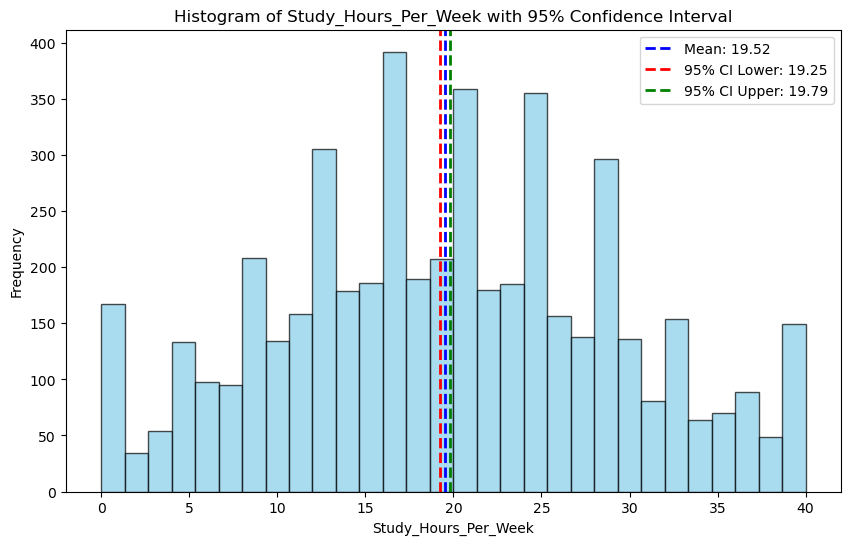

In [86]:
y = df['Study_Hours_Per_Week'].dropna()  

mean_y = np.mean(y)
sem_y = stats.sem(y)

confidence_interval = stats.t.interval(0.95, len(y)-1, loc=mean_y, scale=sem_y)

plt.figure(figsize=(10, 6))
plt.hist(y, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.title("Histogram of Study_Hours_Per_Week with 95% Confidence Interval")
plt.xlabel("Study_Hours_Per_Week")
plt.ylabel("Frequency")

plt.axvline(mean_y, color='blue', linestyle='--', linewidth=2, label=f"Mean: {mean_y:.2f}")
plt.axvline(confidence_interval[0], color='red', linestyle='--', linewidth=2, label=f"95% CI Lower: {confidence_interval[0]:.2f}")
plt.axvline(confidence_interval[1], color='green', linestyle='--', linewidth=2, label=f"95% CI Upper: {confidence_interval[1]:.2f}")

plt.legend()

plt.show()

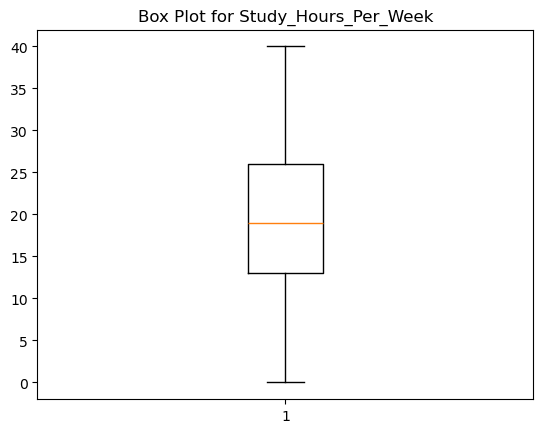

In [88]:
plt.boxplot(x, vert=True)
plt.title('Box Plot for Study_Hours_Per_Week')
plt.show()

In [90]:
df[['Study_Hours_Per_Week', 'Assignments_Completed']].groupby('Assignments_Completed').mean().reset_index()

,Assignments_Completed,Study_Hours_Per_Week
0,1,14.120363
1,2,22.233555
2,3,26.635374
3,4,31.458333
4,5,35.621212


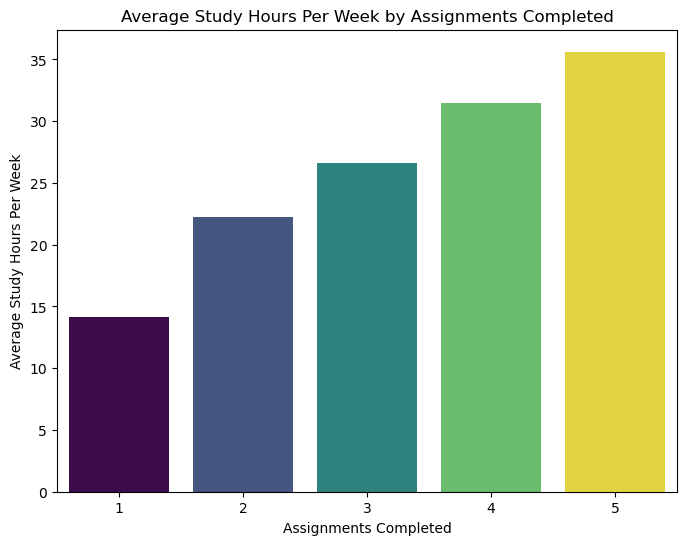

In [102]:
study_hours_avg = df[['Study_Hours_Per_Week', 'Assignments_Completed']].groupby('Assignments_Completed').mean().reset_index()

# Plot the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(data=study_hours_avg, x='Assignments_Completed', y='Study_Hours_Per_Week', hue='Assignments_Completed', palette="viridis", legend=False)
plt.title('Average Study Hours Per Week by Assignments Completed')
plt.xlabel('Assignments Completed')
plt.ylabel('Average Study Hours Per Week')
plt.show()

In [92]:
df['IT_Knowledge'].unique()

array(['Medium', 'High', 'Low'], dtype=object)

In [94]:
pc = df[['IT_Knowledge', 'JAMB_Score']].groupby(['IT_Knowledge']).mean()
pc

,JAMB_Score
IT_Knowledge,
High,187.303872
Low,166.834962
Medium,172.865990


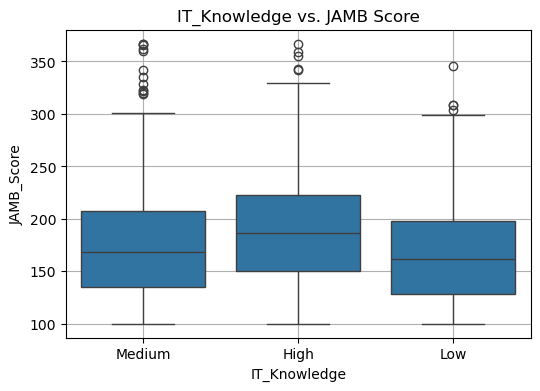

In [96]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='IT_Knowledge', y='JAMB_Score')
plt.title('IT_Knowledge vs. JAMB Score')
plt.xlabel('IT_Knowledge')
plt.ylabel('JAMB_Score')
plt.grid(True)
plt.show()

In [98]:
df['Parent_Education_Level'].unique()

array(['Tertiary', 'Unavailable', 'Primary', 'Secondary'], dtype=object)

In [74]:
pc = df[['Parent_Education_Level', 'JAMB_Score']].groupby(['Parent_Education_Level']).mean()
pc

,JAMB_Score
Parent_Education_Level,
Primary,169.112360
Secondary,176.573265
Tertiary,184.738095
Unavailable,162.569024


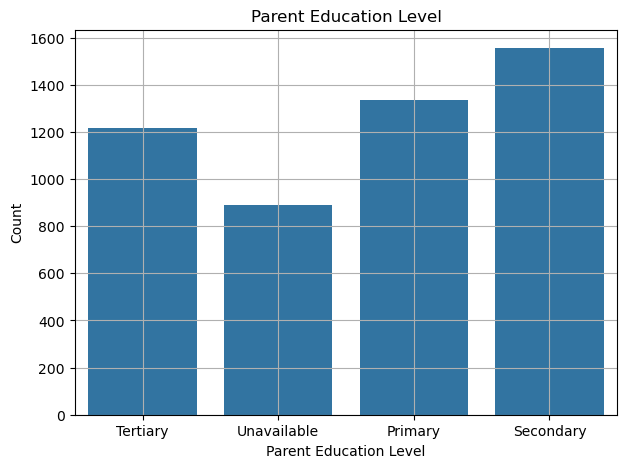

In [136]:
filtered_df = df[df['Parent_Education_Level'].isin(['Tertiary', 'Unavailable', 'Primary', 'Secondary'])]

plt.figure(figsize=(7, 5))
sns.countplot(data=filtered_df, x='Parent_Education_Level')
plt.title('Parent Education Level')
plt.xlabel('Parent Education Level')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [49]:
df['School_Type'].unique()

array(['Public', 'Private'], dtype=object)

In [51]:
pc = df[['School_Type', 'JAMB_Score']].groupby(['School_Type']).mean()
pc

,JAMB_Score
School_Type,
Private,181.216601
Public,171.655689


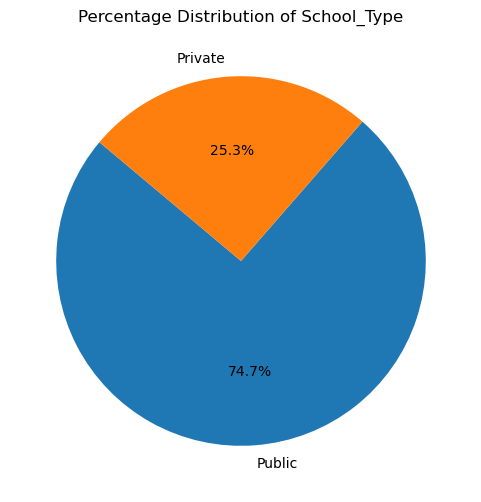

In [59]:
percentage_extra = df['School_Type'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(percentage_extra, labels=percentage_extra.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage Distribution of School_Type')
plt.show()

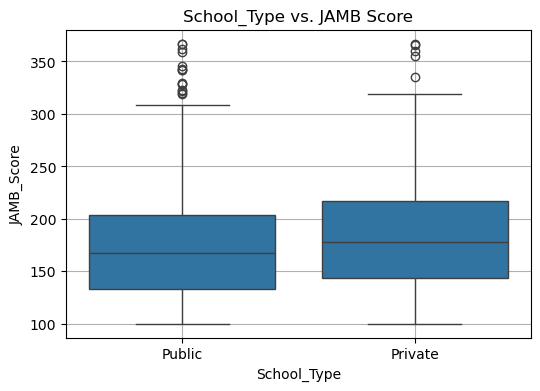

In [102]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='School_Type', y='JAMB_Score')
plt.title('School_Type vs. JAMB Score')
plt.xlabel('School_Type')
plt.ylabel('JAMB_Score')
plt.grid(True)
plt.show()

In [66]:
df['School_Location'].unique()

array(['Urban', 'Rural'], dtype=object)

In [68]:
pc = df[['School_Location', 'JAMB_Score']].groupby(['School_Location']).mean()
pc

,JAMB_Score
School_Location,
Rural,172.549861
Urban,175.239944


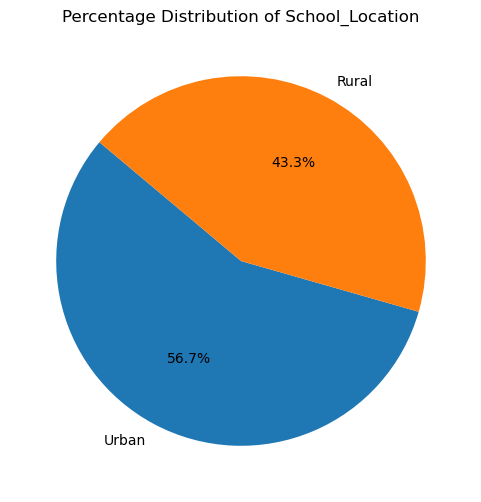

In [70]:
percentage_extra = df['School_Location'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(percentage_extra, labels=percentage_extra.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage Distribution of School_Location')
plt.show()

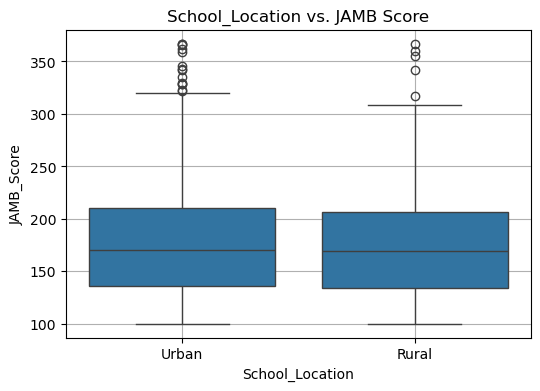

In [104]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='School_Location', y='JAMB_Score')
plt.title('School_Location vs. JAMB Score')
plt.xlabel('School_Location')
plt.ylabel('JAMB_Score')
plt.grid(True)
plt.show()

In [106]:
df['Extra_Tutorials'].unique()

array(['Yes', 'No'], dtype=object)

In [108]:
pc = df[['Extra_Tutorials', 'JAMB_Score']].groupby(['Extra_Tutorials']).mean()
pc

,JAMB_Score
Extra_Tutorials,
No,170.566477
Yes,177.012863


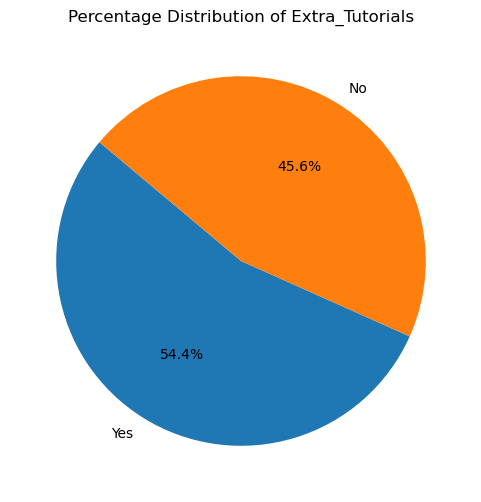

In [47]:
percentage_extra = df['Extra_Tutorials'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(percentage_extra, labels=percentage_extra.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage Distribution of Extra_Tutorials')
plt.show()


In [112]:
df['Access_To_Learning_Materials'].unique()

array(['Yes', 'No'], dtype=object)

In [114]:
pc = df[['Access_To_Learning_Materials', 'JAMB_Score']].groupby(['Access_To_Learning_Materials']).mean()
pc

,JAMB_Score
Access_To_Learning_Materials,
No,170.875453
Yes,175.656007


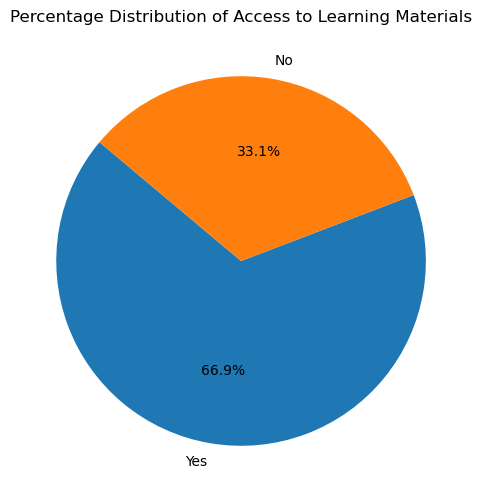

In [116]:
access_learning = df['Access_To_Learning_Materials'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(access_learning, labels=access_learning.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage Distribution of Access to Learning Materials')
plt.show()


In [118]:
df['Parent_Involvement'].unique()

array(['High', 'Medium', 'Low'], dtype=object)

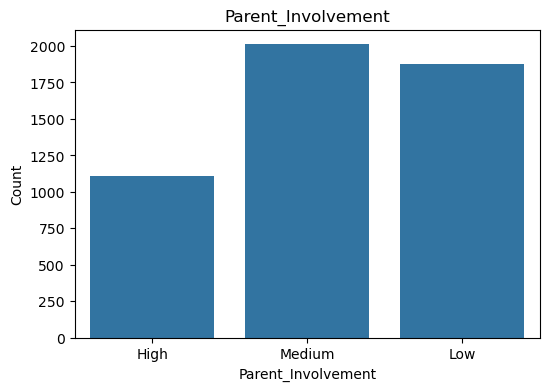

In [120]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Parent_Involvement')
plt.title('Parent_Involvement')
plt.xlabel('Parent_Involvement')
plt.ylabel('Count')
plt.show()

In [122]:
df['Age'].unique()

array([17, 15, 20, 22, 16, 19, 18, 21], dtype=int64)

In [76]:
pc = df[['Age', 'JAMB_Score']].groupby(['Age']).mean()
pc

,JAMB_Score
Age,
15,172.632399
16,178.726172
17,177.427653
18,172.578370
19,174.196291
20,172.061931
21,172.391803
22,172.129952


In [124]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [78]:
pc = df[['Gender', 'JAMB_Score']].groupby(['Gender']).mean()
pc

,JAMB_Score
Gender,
Female,174.763241
Male,173.369231


In [126]:
pd.crosstab(df['Age'], df['Gender'], margins=True) 

Gender,Female,Male,All
Age,,,
15,322,320,642
16,332,329,661
17,327,295,622
18,314,324,638
19,340,307,647
20,287,262,549
21,295,315,610
22,313,318,631
All,2530,2470,5000


In [128]:
df['Socioeconomic_Status'].unique()

array(['Low', 'High', 'Medium'], dtype=object)

In [130]:
pc = df[['Socioeconomic_Status', 'JAMB_Score']].groupby(['Socioeconomic_Status']).mean()
pc

,JAMB_Score
Socioeconomic_Status,
High,190.744917
Low,164.772424
Medium,174.131164


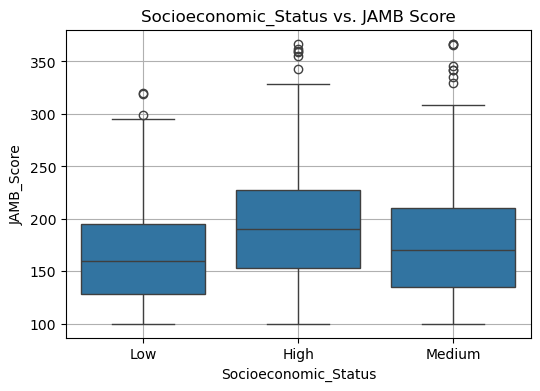

In [132]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Socioeconomic_Status', y='JAMB_Score')
plt.title('Socioeconomic_Status vs. JAMB Score')
plt.xlabel('Socioeconomic_Status')
plt.ylabel('JAMB_Score')
plt.grid(True)
plt.show()